In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import nlopt
import seaborn as sns
from statsrat import perform_oat, oat_grid, make_sim_data, learn_plot
from statsrat.expr.predef.cat import ibre, lrn_pred
from statsrat.rw.predef import Kalman
from scipy import stats

In [2]:
par_val = [0.5, 0.1, 4, 5]
print(Kalman.pars)
trials = ibre.make_trials()
#trials = lrn_pred.make_trials()
ds = Kalman.simulate(trials = trials, par_val = par_val)

            min   max  default
drift_var   0.0   2.0     0.01
u_var       0.0   5.0     0.10
w_var0      0.0  10.0     1.00
resp_scale  0.0  10.0     1.00


Help on function learn_plot in module statsrat:

learn_plot(ds, var, sel=None, color_var=None, facet_var=None, drop_zeros=False, only_main=False, stage_labels=True)
    Plots learning simulation data as a function of time.
    
    Parameters
    ----------
    ds : dataset (xarray)
        Learning simulation data (output of a model's 'simulate' method).
    var : string
        Variable to plot.
    sel : dict, optional
        Used to select a subset of 'var'.  Defaults to 'None' (i.e. all
        data in 'var' are plotted).
    color_var : string, optional
        Variable to be represented by color.
        Defaults to None (see notes).
    facet_var : string, optional
        Variable to control faceting.
        Defaults to None (see notes).
    drop_zeros : boolean, optional
        Drop rows where 'var' is zero.  Defaults to False.
    only_main : boolean, optional
        Only keep rows where 't_name' is 'main', i.e. time steps with
        punctate cues and/or non-zero outco

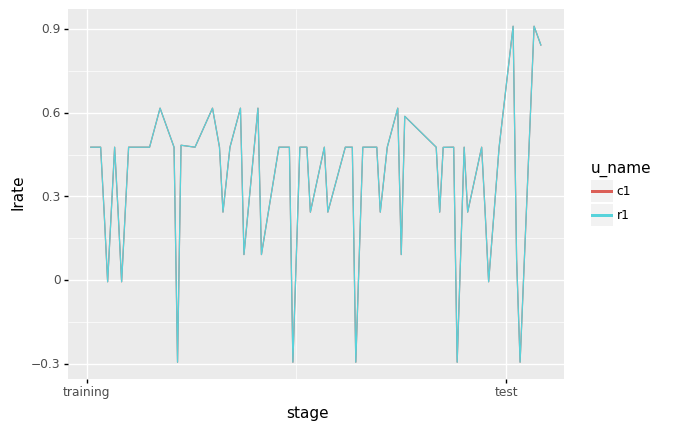

<ggplot: (297728287)>

In [3]:
learn_plot(ds, 'lrate', sel = {'f_name': ['pc1'], 'u_name': ['c1', 'r1']}, drop_zeros = True)

In [ ]:
# ordinal adequacy test (OAT) for the IBRE

n = 30
max_time = 120
#algorithm = nlopt.GN_DIRECT_L
#algorithm = nlopt.GN_AGS
algorithm = nlopt.GN_ORIG_DIRECT
#algorithm = nlopt.GD_STOGO

oat_result = perform_oat(Kalman, ibre, minimize = False, n = n, max_time = max_time, algorithm = algorithm)
print(oat_result[0])
print(oat_result[1])

Maximizing OAT score.
[1.  2.5 5.  5. ]
[1.666 2.5   5.    5.   ]
[0.334 2.5   5.    5.   ]
[1.    4.166 5.    5.   ]
[1.    0.834 5.    5.   ]
[1.         2.5        8.33266667 5.        ]
[1.         2.5        1.66733333 5.        ]
[1.666 0.834 5.    5.   ]
[0.334 0.834 5.    5.   ]
[1.         0.834      8.33266667 5.        ]
[1.         0.834      1.66733333 5.        ]
[1.666 4.166 5.    5.   ]
[0.334 4.166 5.    5.   ]
[1.         4.166      8.33266667 5.        ]
[1.         4.166      1.66733333 5.        ]
[1.666      0.834      8.33266667 5.        ]
[0.334      0.834      8.33266667 5.        ]
[1.666      0.834      1.66733333 5.        ]
[0.334      0.834      1.66733333 5.        ]
[1.222      0.834      8.33266667 5.        ]
[0.778      0.834      8.33266667 5.        ]
[1.         1.38933333 8.33266667 5.        ]
[1.         0.27866667 8.33266667 5.        ]
[1.         0.834      9.44355556 5.        ]
[1.         0.834      7.22177778 5.        ]
[1.         0.83

In [ ]:
free_par = 'drift_var'
fixed_values = {'u_var': 0.116746, 'w_var0': 5.0, 'resp_scale': 5.0}

df = oat_grid(Kalman,
              ibre,
              free_par = free_par,
              fixed_values = fixed_values,
              n_points = 5)
sns.relplot(x = free_par, y = 'oat_score', data = df)